In [1]:
import re
from collections import defaultdict

# Membaca file teks
file_path = "chatgroup.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    data = file.readlines()

# Memproses data untuk memisahkan grup
group_comments = defaultdict(list)
current_group = None

for line in data:
    # Deteksi pembuatan grup baru
    group_match = re.search(r'membuat grup "(.*?)"', line)
    if group_match:
        current_group = group_match.group(1)
    
    # Menyimpan komentar ke grup saat ini
    if current_group and re.search(r':', line):
        group_comments[current_group].append(line)

# Menentukan grup dengan komentar terbanyak
most_active_group = max(group_comments, key=lambda x: len(group_comments[x]))
most_active_comments = group_comments[most_active_group]

# Menyimpan komentar grup ke file teks
output_file = "data_group.txt"
with open(output_file, 'w', encoding='utf-8') as file:
    file.writelines(most_active_comments)

print(f"Grup dengan komentar terbanyak: {most_active_group}")
print(f"File teks tersimpan di: {output_file}")


Grup dengan komentar terbanyak: MENTORING FKI 2022 
File teks tersimpan di: data_group.txt


In [2]:
import csv

# Membaca kembali file teks
with open(output_file, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Menyimpan dalam format CSV
csv_file = "data_group.csv"
with open(csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp", "Sender", "Message"])
    
    for line in lines:
        match = re.match(r'^(.*?) - (.*?): (.*)', line)
        if match:
            timestamp, sender, message = match.groups()
            writer.writerow([timestamp, sender, message])

print(f"File CSV tersimpan di: {csv_file}")


File CSV tersimpan di: data_group.csv


In [3]:
import tarfile

tar_file = "data_group.tar"
with tarfile.open(tar_file, "w") as tar:
    tar.add(csv_file, arcname="data_group.csv")

print(f"File TAR tersimpan di: {tar_file}")

File TAR tersimpan di: data_group.tar


In [4]:
import string

# Fungsi untuk membersihkan teks
def clean_text(text):
    allowed_chars = string.ascii_letters + string.digits + string.punctuation + " "
    return ''.join(char for char in text if char in allowed_chars)

# Membersihkan data
cleaned_lines = []
for line in most_active_comments:
    match = re.match(r'^(.*?) - (.*?): (.*)', line)
    if match:
        timestamp, sender, message = match.groups()
        cleaned_message = clean_text(message)
        cleaned_lines.append(f"{timestamp} - {sender}: {cleaned_message}\n")

# Menyimpan file teks hasil pembersihan
cleaned_file = "data_group_cleaned.txt"
with open(cleaned_file, 'w', encoding='utf-8') as file:
    file.writelines(cleaned_lines)

print(f"File teks yang dibersihkan tersimpan di: {cleaned_file}")


File teks yang dibersihkan tersimpan di: data_group_cleaned.txt


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca data yang telah dibersihkan
with open(cleaned_file, 'r', encoding='utf-8') as file:
    messages = [re.search(r': (.*)', line).group(1) for line in file if re.search(r': (.*)', line)]

# Vektorisasi data dengan TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(messages)


In [6]:
from sklearn.cluster import KMeans

# Melakukan clustering dengan jumlah klaster yang bervariasi
for n_clusters in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # Menampilkan 3 kata teratas dari setiap klaster
    print(f"\nHasil clustering untuk {n_clusters} klaster:")
    for i in range(n_clusters):
        cluster_center = kmeans.cluster_centers_[i]
        top_indices = cluster_center.argsort()[-3:][::-1]
        top_words = [vectorizer.get_feature_names_out()[j] for j in top_indices]
        print(f"Klaster {i+1}: {', '.join(top_words)}")



Hasil clustering untuk 3 klaster:
Klaster 1: eben, radadi, ora
Klaster 2: dihapus, pesan, ini
Klaster 3: disertakan, media, tidak

Hasil clustering untuk 4 klaster:
Klaster 1: eben, radadi, ora
Klaster 2: dihapus, pesan, ini
Klaster 3: media, disertakan, tidak
Klaster 4: pengumuman, yuliarsih, kick

Hasil clustering untuk 5 klaster:
Klaster 1: eben, radadi, yuliarsih
Klaster 2: dihapus, pesan, ini
Klaster 3: alhamdulillah, mas, ya
Klaster 4: pengumuman, yuliarsih, kick
Klaster 5: disertakan, media, tidak


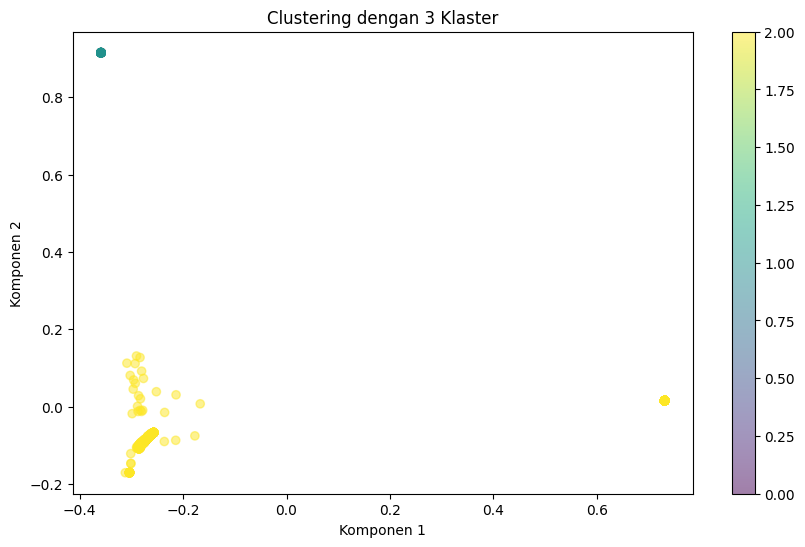

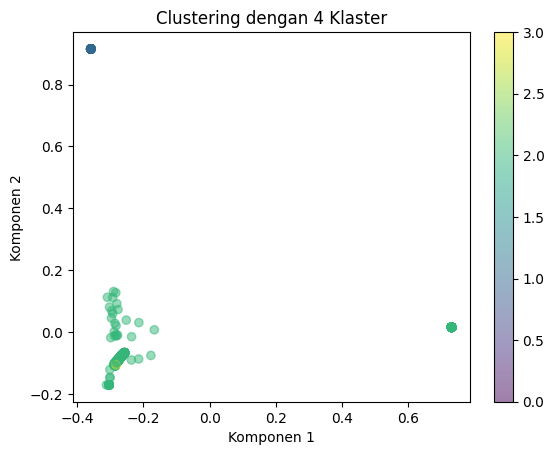

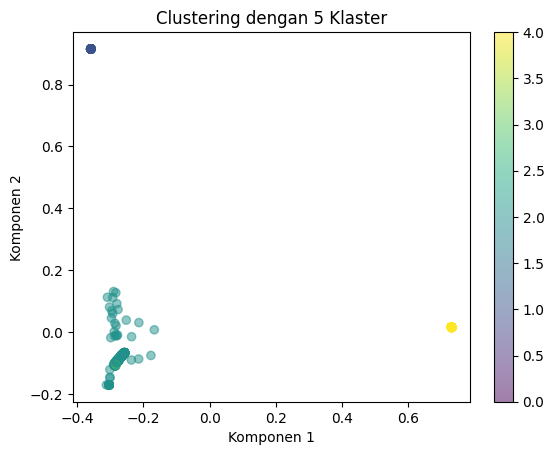

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot hasil clustering
plt.figure(figsize=(10, 6))
for n_clusters in [3, 4, 5]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f"Clustering dengan {n_clusters} Klaster")
    plt.xlabel("Komponen 1")
    plt.ylabel("Komponen 2")
    plt.colorbar()
    plt.show()


In [8]:
html_content = f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Laporan Clustering</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 20px; }}
        h1 {{ color: #2c3e50; }}
        .cluster {{ margin-bottom: 20px; }}
    </style>
</head>
<body>
    <h1>Laporan Hasil Clustering</h1>
    <p>Data diproses dan dianalisis dengan metode TF-IDF dan algoritma KMeans untuk membuat 3, 4, dan 5 klaster.</p>
    <h2>Analisis</h2>
    <div>
        <h3>Hasil Clustering (3 Klaster)</h3>
        <p>... Analisis dan kata teratas ...</p>
        <h3>Hasil Clustering (4 Klaster)</h3>
        <p>... Analisis dan kata teratas ...</p>
        <h3>Hasil Clustering (5 Klaster)</h3>
        <p>... Analisis dan kata teratas ...</p>
    </div>
</body>
</html>
"""

report_file = "laporan.html"
with open(report_file, 'w', encoding='utf-8') as file:
    file.write(html_content)

print(f"Laporan HTML tersimpan di: {report_file}")


Laporan HTML tersimpan di: laporan.html
